In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [89]:
with open('data/ising_exact_data.pkl', 'rb') as f:
    T_arr, E_exact, M_exact, T_c, L = pickle.load(f)

with open('data/ising_numba_data.pkl', 'rb') as f:
    E_numba, M_numba, time_numba, spin_config_numba = pickle.load(f)

with open('data/ising_cython_data.pkl', 'rb') as f:
    E_cython, M_cython, time_cython, spin_config_cython = pickle.load(f)

with open('data/ising_benchmark_data.pkl', 'rb') as f:
    time_py, time_numba, time_cython, L_benchmark = pickle.load(f)

In [86]:
py_numba_ratio = np.array(time_py) / np.array(time_numba)
py_cython_ratio = np.array(time_py) / np.array(time_cython)

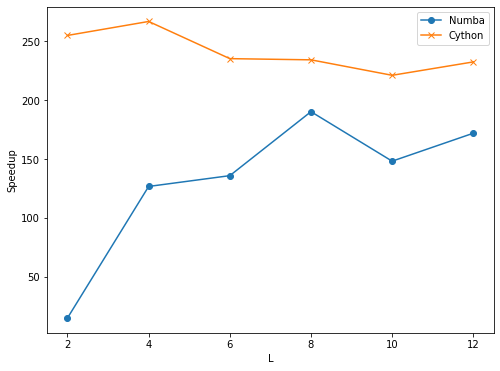

In [90]:
# Plot speedup (over pure Python) vs. L
plt.figure(figsize=(8, 6))
plt.plot(L_benchmark, py_numba_ratio, 'o-', label='Numba')
plt.plot(L_benchmark, py_cython_ratio, 'x-', label='Cython')
plt.xlabel('L')
plt.ylabel('Speedup')
plt.legend()
plt.show()

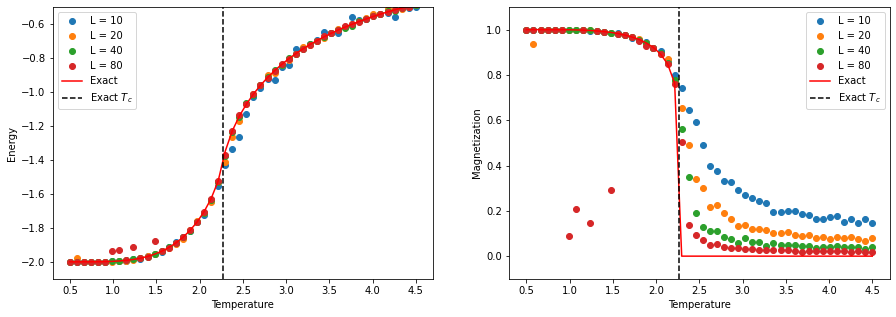

In [91]:
# Subplot 1: Energy
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for i in range(len(L)):
    axs[0].scatter(T_arr, E_numba[i], label='L = {}'.format(L[i]))
axs[0].plot(T_arr, E_exact, 'r', label='Exact')
axs[0].axvline(T_c, color='k', linestyle='--', label='Exact $T_c$')
axs[0].set_ylim(-2.1, -0.5)
axs[0].set_xlabel('Temperature')
axs[0].set_ylabel('Energy')
axs[0].legend()
# Subplot 2: Magnetization
for i in range(len(L)):
    axs[1].scatter(T_arr, M_numba[i], label='L = {}'.format(L[i]))
axs[1].plot(T_arr, M_exact, 'r', label='Exact')
axs[1].axvline(T_c, color='k', linestyle='--', label='Exact $T_c$')
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xlabel('Temperature')
axs[1].set_ylabel('Magnetization')
axs[1].legend()
plt.show()

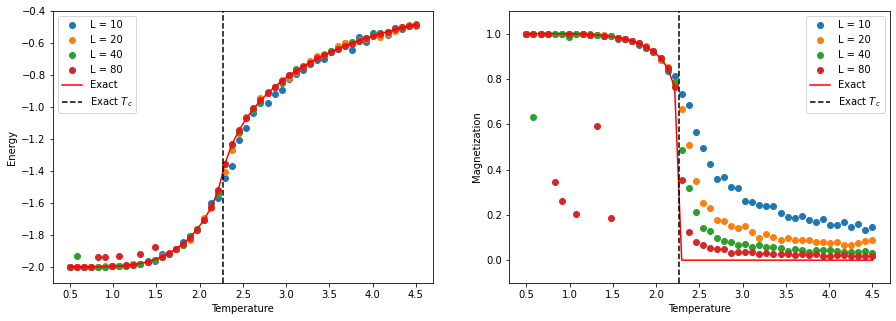

In [92]:
# Subplot 1: Energy
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for i in range(len(L)):
    axs[0].scatter(T_arr, E_cython[i], label='L = {}'.format(L[i]))
axs[0].plot(T_arr, E_exact, 'r', label='Exact')
axs[0].axvline(T_c, color='k', linestyle='--', label='Exact $T_c$')
axs[0].set_ylim(-2.1, -0.4)
axs[0].set_xlabel('Temperature')
axs[0].set_ylabel('Energy')
axs[0].legend()
# Subplot 2: Magnetization
for i in range(len(L)):
    axs[1].scatter(T_arr, M_cython[i], label='L = {}'.format(L[i]))
axs[1].plot(T_arr, M_exact, 'r', label='Exact')
axs[1].axvline(T_c, color='k', linestyle='--', label='Exact $T_c$')
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xlabel('Temperature')
axs[1].set_ylabel('Magnetization')
axs[1].legend()
plt.show()

In [93]:
print(time_numba)
print(time_cython)

[1.7644171714782715, 0.8905043601989746, 1.7454891204833984, 2.214427947998047, 4.352155923843384, 5.146789073944092]
[0.10382485389709473, 0.4228806495666504, 1.008133888244629, 1.798248291015625, 2.9167239665985107, 3.806116819381714]


In [94]:
from PIL import Image
from ipywidgets import interact

def display_spin_field(spin_config):
    return Image.fromarray(np.uint8((spin_config + 1) * 0.5 * 255)).resize((200, 200))

def display_ising_sequence(images):
    def _show(frame=(0, len(images) - 1)):
        return display_spin_field(images[frame])
    return interact(_show)

In [95]:
display_ising_sequence(spin_config_cython[3])

interactive(children=(IntSlider(value=24, description='frame', max=49), Output()), _dom_classes=('widget-inter…

<function __main__.display_ising_sequence.<locals>._show(frame=(0, 49))>

In [100]:
len(spin_config_cython[3])

50

In [102]:
# Save images of 80x80 spin configurations
for i in range(len(spin_config_cython[3])):
    Image.fromarray(np.uint8((spin_config_cython[3][i] + 1) * 0.5 * 255)).resize((200, 200)).save('animation/ising_{}.png'.format(i))

In [132]:
# Create GIF
import glob

frames = [Image.open(i) for i in sorted(glob.glob('animation/ising_*.png'), key=lambda x: int(x.split('_')[1].split('.')[0]))] # Sort by frame number (e.g. ising_0.png, ising_1.png, ising_2.png, ...)
frame_one = frames[0]
frame_one.save('ising_spins.gif', format='GIF', append_images=frames[1:], save_all=True, duration=150, optimize=True, loop=1)